# Dataset Exploration -  N-CMAPSS DS02

The new C-MAPSS dataset DS02 from NASA provides degradation trajectories of 9 turbofan engines with unknown and different initial health condition for complete flights and two failure modes (HPT efficiency degradation & HPT efficiency degradation combined with LPT efficiency and capacity degradation). The data were synthetically generated with the Commercial Modular Aero-Propulsion System Simulation (C-MAPSS) dynamical model. The data contains multivariate sensors readings of the complete run-to-failure trajectories. Therefore, the records stop at the cycle/time the engine failed. A total number of 6.5M time stamps are available.

Copyright (c) by Manuel Arias.

In [1]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
### Set-up - Define file location
filename = 'N-CMAPSS_DS01-005.h5'

#### Read Raw Data

In [3]:
# Time tracking, Operation time (min):  0.003
t = time.process_time()  

# Load data
with h5py.File(filename, 'r') as hdf:
        # Development set
        W_dev = np.array(hdf.get('W_dev'))             # W
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL  
        A_test = np.array(hdf.get('A_test'))           # Auxiliary
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))  
        X_v_var = np.array(hdf.get('X_v_var')) 
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))
        
        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        X_v_var = list(np.array(X_v_var, dtype='U20')) 
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))
                          
W = np.concatenate((W_dev, W_test), axis=0)  
X_s = np.concatenate((X_s_dev, X_s_test), axis=0)
X_v = np.concatenate((X_v_dev, X_v_test), axis=0)
T = np.concatenate((T_dev, T_test), axis=0)
Y = np.concatenate((Y_dev, Y_test), axis=0) 
A = np.concatenate((A_dev, A_test), axis=0) 
    
print('')
print("Operation time (min): " , (time.process_time()-t)/60)
print('')
print ("W shape: " + str(W.shape))
print ("X_s shape: " + str(X_s.shape))
print ("X_v shape: " + str(X_v.shape))
print ("T shape: " + str(T.shape))
print ("A shape: " + str(A.shape))


Operation time (min):  0.03333333333333333

W shape: (7641868, 4)
X_s shape: (7641868, 14)
X_v shape: (7641868, 14)
T shape: (7641868, 10)
A shape: (7641868, 4)


## Auxiliary Information ($A$)

In [4]:
df_A = DataFrame(data=A, columns=A_var)
df_A.describe()

,unit,cycle,Fc,hs
count,7.641868e+06,7.641868e+06,7.641868e+06,7.641868e+06
mean,5.562970e+00,4.452661e+01,2.252313e+00,2.688846e-01
std,2.869946e+00,2.593783e+01,7.779728e-01,4.433799e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.000000e+00,2.200000e+01,2.000000e+00,0.000000e+00
50%,5.000000e+00,4.400000e+01,2.000000e+00,0.000000e+00
75%,8.000000e+00,6.600000e+01,3.000000e+00,1.000000e+00
max,1.000000e+01,1.000000e+02,3.000000e+00,1.000000e+00


###  Units Ids

In [5]:
print('Engine units in df: ', np.unique(df_A['unit']))

Engine units in df:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [57]:
np.unique(df_A['unit'])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### Flight Classes

The units are divided into three flight classes depending on whether the unit is operating short-length flights (i.e., flight class 1), medium-length flights (i.e., flight class 2), or long-length flights (i.e., flight class 2). A number of real flight conditions are available within each of the flight classes.

| Flight Class   | Flight Length [h]
| :-----------:  | :-----------:    
| 1              |    1 to 3        
| 2              |    3 to 5        
| 3              |    5 to 7        


Text(0, 0.5, 'Flight Class # [-]')

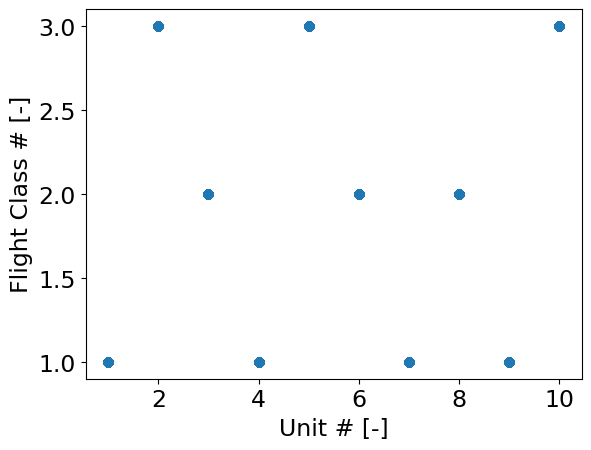

In [6]:
labelsize = 17
plt.plot(df_A.unit, df_A.Fc, 'o')
plt.tick_params(axis='x', labelsize=labelsize )
plt.tick_params(axis='y', labelsize=labelsize )
plt.xlabel('Unit # [-]', fontsize=labelsize)
plt.ylabel('Flight Class # [-]', fontsize=labelsize )

### End Of Failure ($t_{\text{EOF}}$)

The run to failure operation take a different number of cycles for each unit. Below we report the total number of cycles for each unit.

In [7]:
for i in np.unique(df_A['unit']):
    print('Unit: ' + str(i) + ' - Number of flight cyles (t_{EOF}): ', len(np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])))
    #np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])

Unit: 1.0 - Number of flight cyles (t_{EOF}):  100
Unit: 2.0 - Number of flight cyles (t_{EOF}):  75
Unit: 3.0 - Number of flight cyles (t_{EOF}):  100
Unit: 4.0 - Number of flight cyles (t_{EOF}):  95
Unit: 5.0 - Number of flight cyles (t_{EOF}):  89
Unit: 6.0 - Number of flight cyles (t_{EOF}):  94
Unit: 7.0 - Number of flight cyles (t_{EOF}):  90
Unit: 8.0 - Number of flight cyles (t_{EOF}):  89
Unit: 9.0 - Number of flight cyles (t_{EOF}):  80
Unit: 10.0 - Number of flight cyles (t_{EOF}):  82


## Operative Conditions ($w$)

DASHlink- Flight Data For Tail 687.(2012). Retrieved on 2019-01-29 from https://c3.nasa.gov/dashlink/

In [8]:
df_W = DataFrame(data=W, columns=W_var)
df_W['unit'] = df_A['unit'].values

<Figure size 640x480 with 0 Axes>

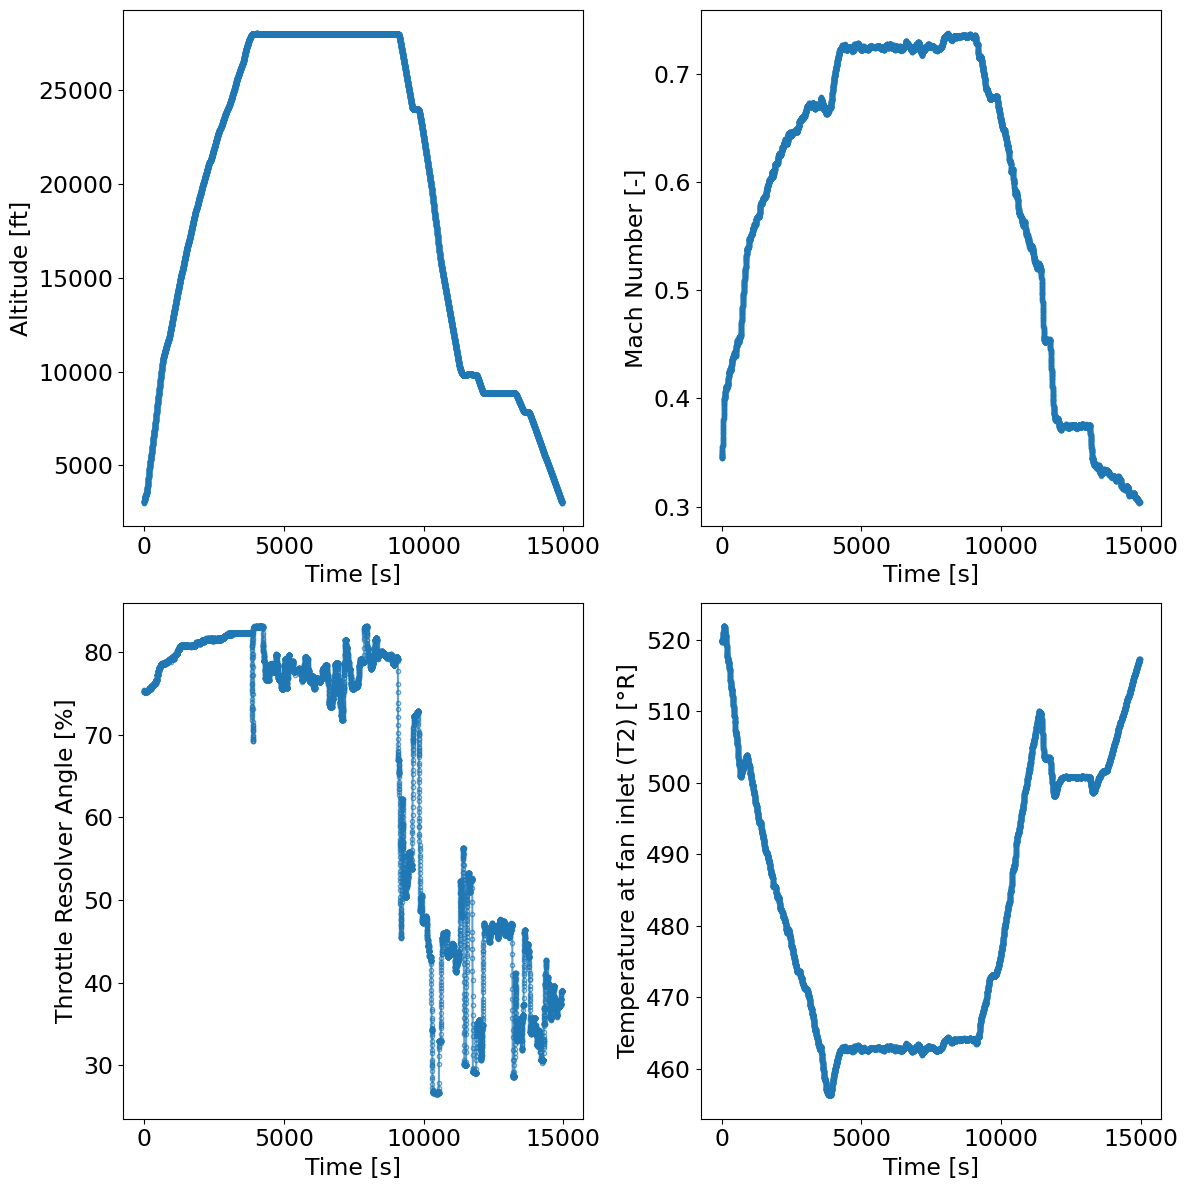

In [47]:
def plot_df_single_color(data, variables, labels, size=12, labelsize=17, name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)    
    fig  = plt.figure(figsize=(size,max(size,rows*2))) 
    
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        ax.plot(data[variables[n]], marker='.', markerfacecolor='none', alpha = 0.7)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)
        plt.ylabel(labels[n], fontsize=labelsize)
        plt.xlabel('Time [s]', fontsize=labelsize)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet (T2) [°R]']
df_W_u = df_W.loc[(df_A.unit == 10) & (df_A.cycle == 1)]
df_W_u.reset_index(inplace=True, drop=True)
plot_df_single_color(df_W_u,W_var,labels)

In [48]:
def plot_df_color_per_unit(data, variables, labels, size=7, labelsize=17, option='Time', name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)
    leg  = []
    fig  = plt.figure(figsize=(size,max(size,rows*2)))
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    unit_sel  = np.unique(data['unit'])
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for j in unit_sel:
            data_unit = data.loc[data['unit'] == j]
            if option=='cycle':
                time_s = data.loc[data['unit'] == j, 'cycle']
                label_x = 'Time [cycle]'
            else:
                time_s = np.arange(len(data_unit))
                label_x = 'Time [s]'
            ax.plot(time_s, data_unit[variables[n]], '-o', color=color_dic_unit['Unit ' + str(int(j))],
                    alpha=0.7, markersize=5)
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
            leg.append('Unit '+str(int(j)))
        plt.ylabel(labels[n], fontsize=labelsize)    
        plt.xlabel(label_x, fontsize=labelsize)
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        if n==0:
            ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.legend(leg, loc='best', fontsize=labelsize-2) #lower left
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

### Flight Traces

<Figure size 640x480 with 0 Axes>

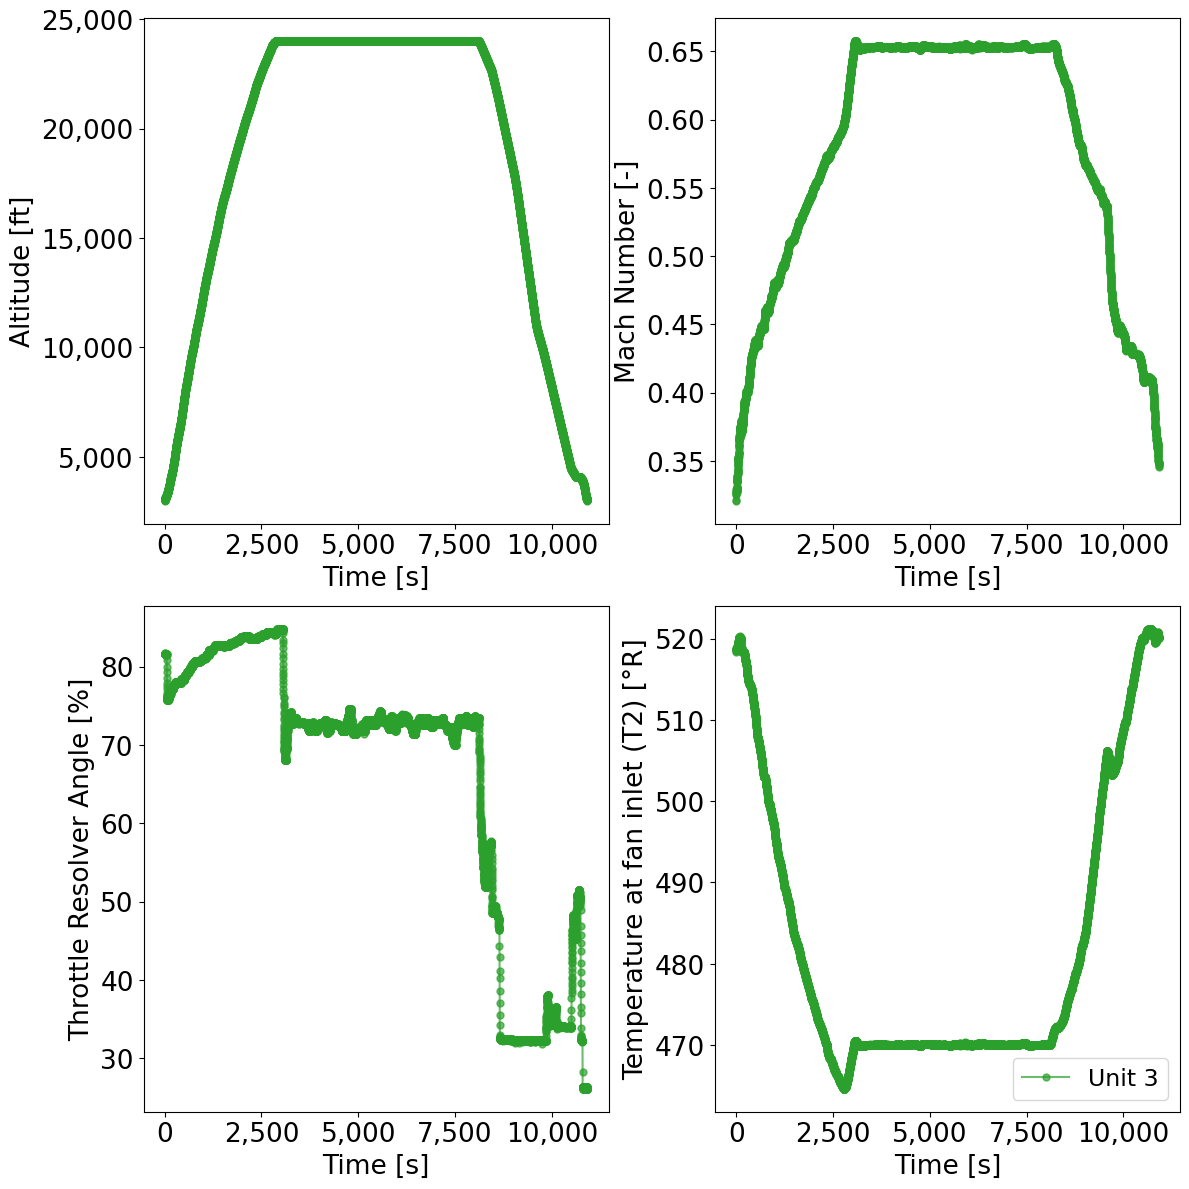

In [52]:
df_W_u = df_W.loc[(df_A.unit == 3) & (df_A.cycle == 1)]
df_W_u.reset_index(inplace=True, drop=True)
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet (T2) [°R]']
plot_df_color_per_unit(df_W_u, W_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')

### Flight envelope

Text(0, 0.5, 'Flight Altitude - [ft]')

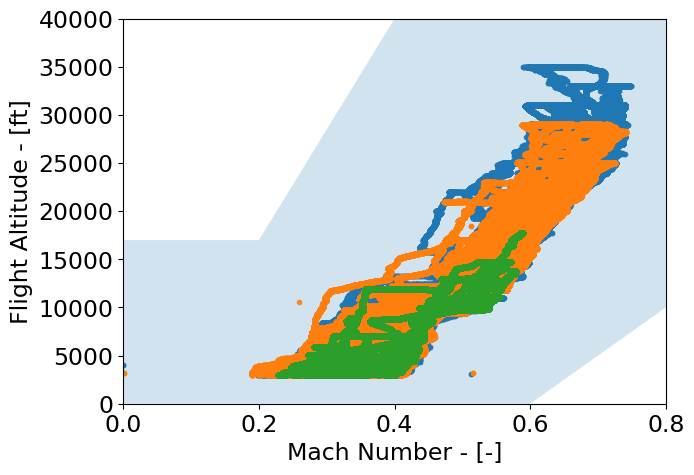

In [14]:
labelsize = 17
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8])
u = np.array([1.7, 1.7, 4.0, 4.0, 4.0])*10000
l = np.array([0.0, 0.0, 0.0, 0.0, 1.0])*10000
plt.figure(figsize=(7,5)) 
plt.fill_between(x, l, u, alpha=0.2)
plt.plot(df_W.loc[df_A['Fc'] == 3, 'Mach'], df_W.loc[df_A['Fc'] == 3, 'alt'], '.', alpha=0.9)
plt.plot(df_W.loc[df_A['Fc'] == 2, 'Mach'], df_W.loc[df_A['Fc'] == 2, 'alt'], '.', alpha=0.9)
plt.plot(df_W.loc[df_A['Fc'] == 1, 'Mach'], df_W.loc[df_A['Fc'] == 1, 'alt'], '.', alpha=0.9)
plt.tick_params(axis='x', labelsize=labelsize )
plt.tick_params(axis='y', labelsize=labelsize )
plt.xlim((0.0, 0.8))
plt.ylim((0, 40000)) 
plt.xlabel('Mach Number - [-]', fontsize=labelsize)
plt.ylabel('Flight Altitude - [ft]', fontsize=labelsize)

### Histogram of Flight Conditions

In [15]:
def plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=17, name=None):
    """
    """
    plt.clf()
       
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs = gridspec.GridSpec(rows, cols)
    
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    fig = plt.figure(figsize=(size,max(size,rows*2)))       

    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for k, elem in enumerate(units):
            sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
                        color=color_dic_unit[leg[k]], shade=True, gridsize=100)  
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
        
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))        
        plt.xlabel(labels[n], fontsize=labelsize)
        plt.ylabel('Density [-]', fontsize=labelsize)
        if n==0:
            plt.legend(leg, fontsize=labelsize-4, loc=0)
        else:
            plt.legend(leg, fontsize=labelsize-4, loc=2)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)    
    plt.show()
    plt.close()

C:\Users\Ömer\AppData\Local\Temp\ipykernel_10324\4172860585.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
C:\Users\Ömer\AppData\Local\Temp\ipykernel_10324\4172860585.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
C:\Users\Ömer\AppData\Local\Temp\ipykernel_10324\4172860585.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
C:\Users\Ömer\AppData\Local\Temp\ipykernel_10324\4172860585.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.


<Figure size 640x480 with 0 Axes>

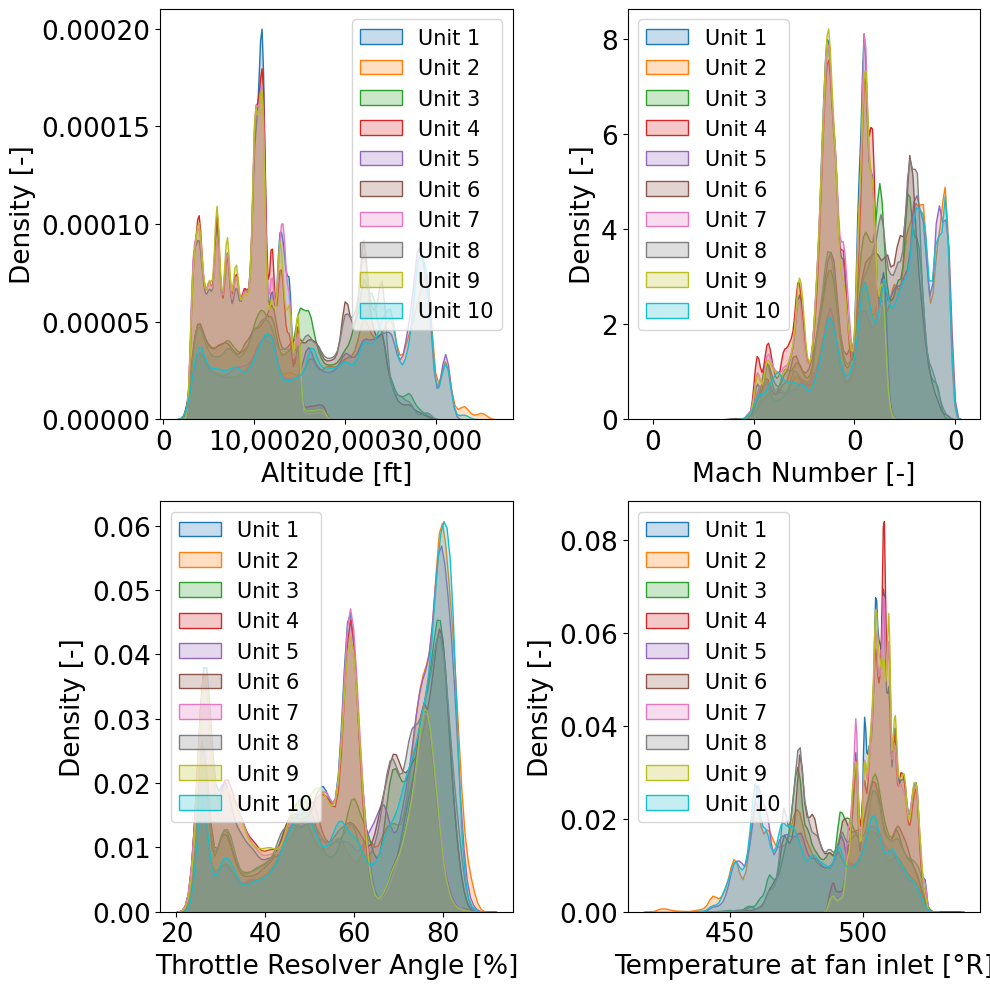

In [16]:
variables = ['alt', 'Mach', 'TRA', 'T2']
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet [°R]']
size = 10

units = list(np.unique(df_A['unit']))
leg = ['Unit ' + str(int(u)) for u in units]

plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=19, name='kde_DS02.png')

## Degradation ($\theta$)

In [17]:
df_T = DataFrame(data=T, columns=T_var) 
df_T['unit'] = df_A['unit'].values
df_T['cycle'] = df_A['cycle'].values
df_Ts = df_T.drop_duplicates()
df_Ts.describe()

,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,cycle
count,894.0,894.0,894.0,894.0,894.0,894.0,894.000000,894.0,894.0,894.0,894.000000,894.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,-0.003893,0.0,0.0,0.0,5.392617,45.551454
std,0.0,0.0,0.0,0.0,0.0,0.0,0.004207,0.0,0.0,0.0,2.842879,26.409073
min,0.0,0.0,0.0,0.0,0.0,0.0,-0.018806,0.0,0.0,0.0,1.000000,1.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,-0.005124,0.0,0.0,0.0,3.000000,23.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,-0.001917,0.0,0.0,0.0,5.000000,45.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,-0.001091,0.0,0.0,0.0,8.000000,67.750000
max,0.0,0.0,0.0,0.0,0.0,0.0,-0.000117,0.0,0.0,0.0,10.000000,100.000000


In [18]:
import plotly.express as px
varsel = ['unit', 'HPT_eff_mod', 'LPT_eff_mod', 'LPT_flow_mod']
df_Tss = df_Ts.loc[:,varsel]
fig = px.parallel_coordinates(df_Tss, color="unit", labels={"unit": "Units",
                              "HPT_eff_mod": "HPT_eff_mod", "LPT_eff_mod": "LPT_eff_mod",
                              "LPT_flow_mod": "LPT_flow_mod", },
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

<Figure size 640x480 with 0 Axes>

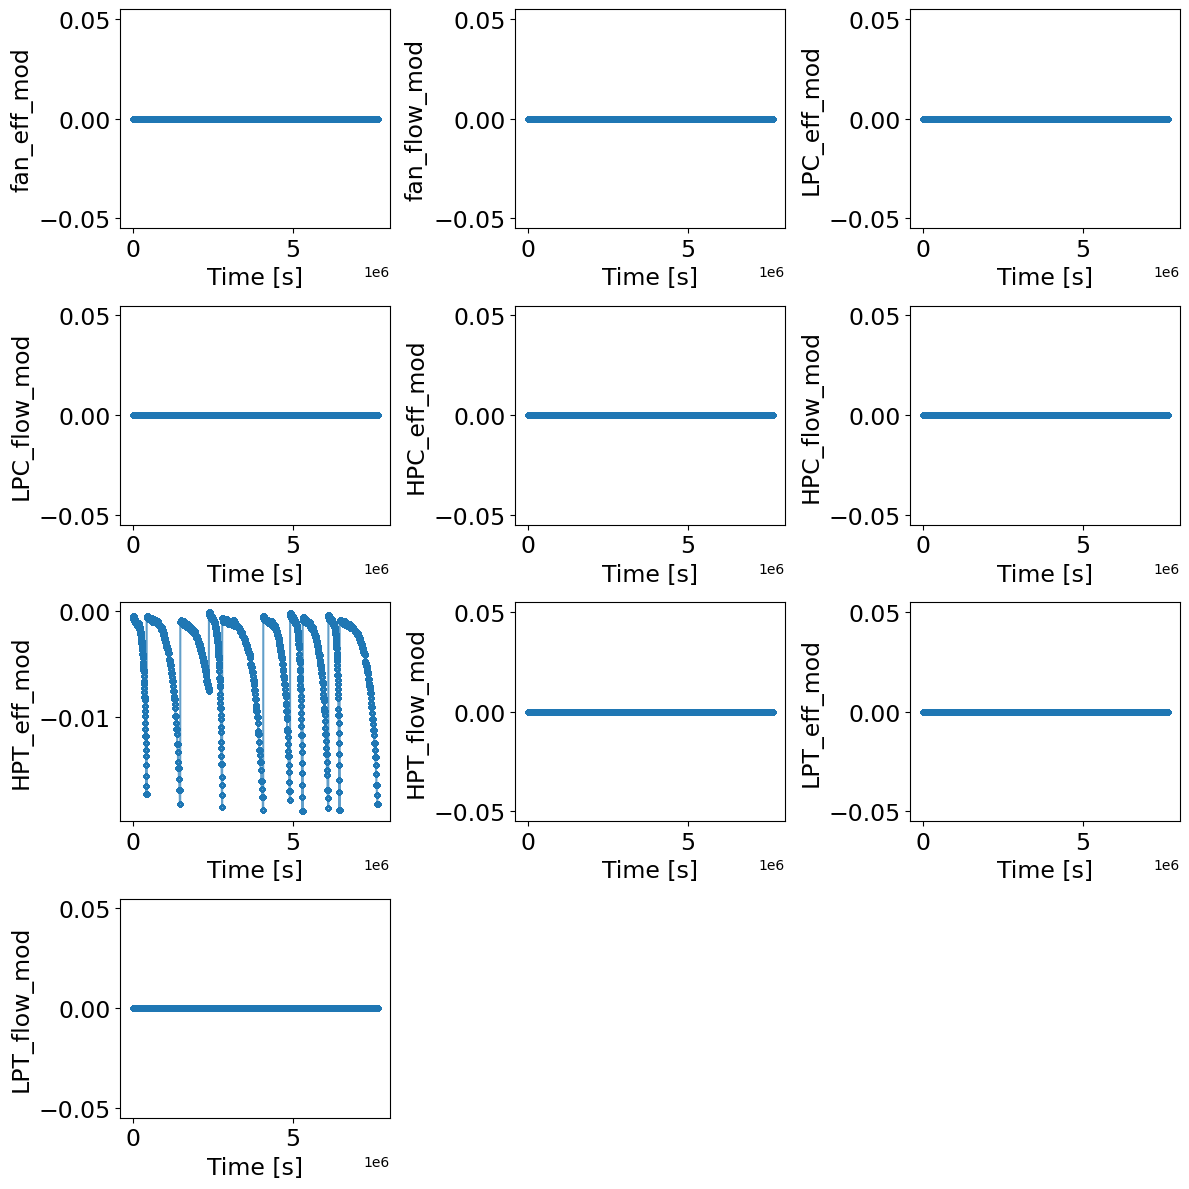

In [19]:
labels = T_var
plot_df_single_color(df_T, T_var , labels)

<Figure size 640x480 with 0 Axes>

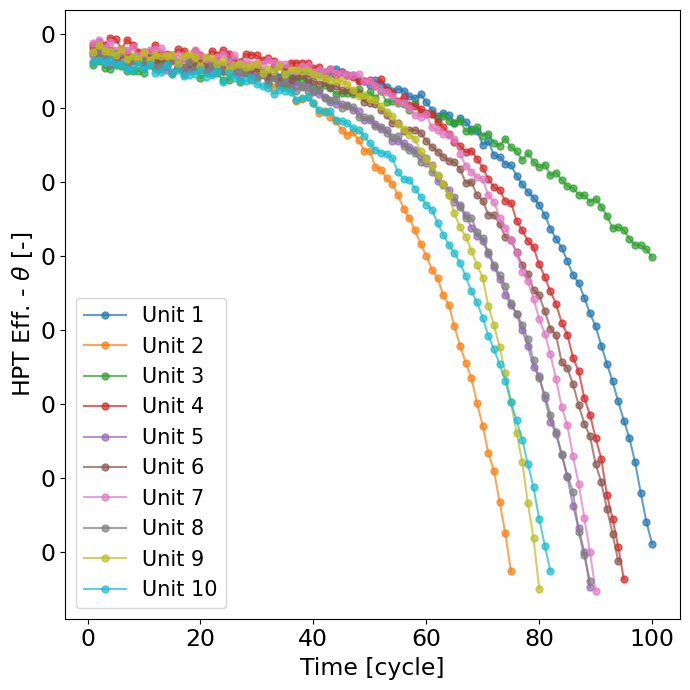

In [20]:
plot_df_color_per_unit(df_Ts, ['HPT_eff_mod'], [r'HPT Eff. - $\theta$ [-]'], size=7,  option='cycle')

## Sensor readings ($X_s$)

In [21]:
df_X_s = DataFrame(data=X_s, columns=X_s_var) 

###  Single Unit 

<Figure size 640x480 with 0 Axes>

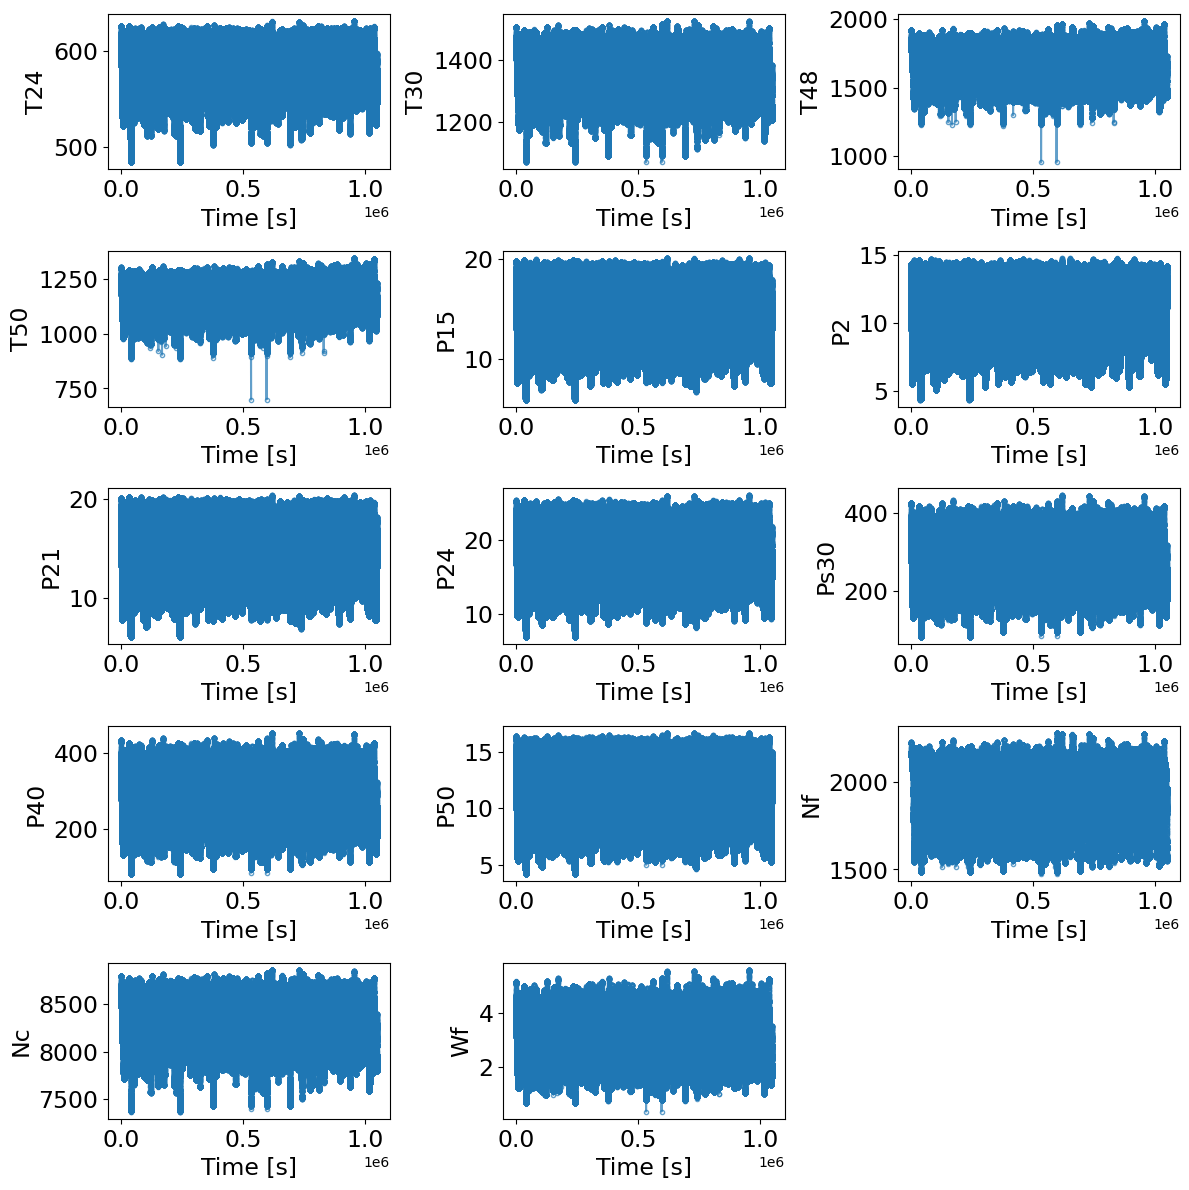

In [22]:
df_X_s_u = df_X_s.loc[df_A.unit == 2]
df_X_s_u.reset_index(inplace=True, drop=True)
labels = X_s_var
plot_df_single_color(df_X_s_u, X_s_var, labels)

###  Single Flight Cycle

<Figure size 640x480 with 0 Axes>

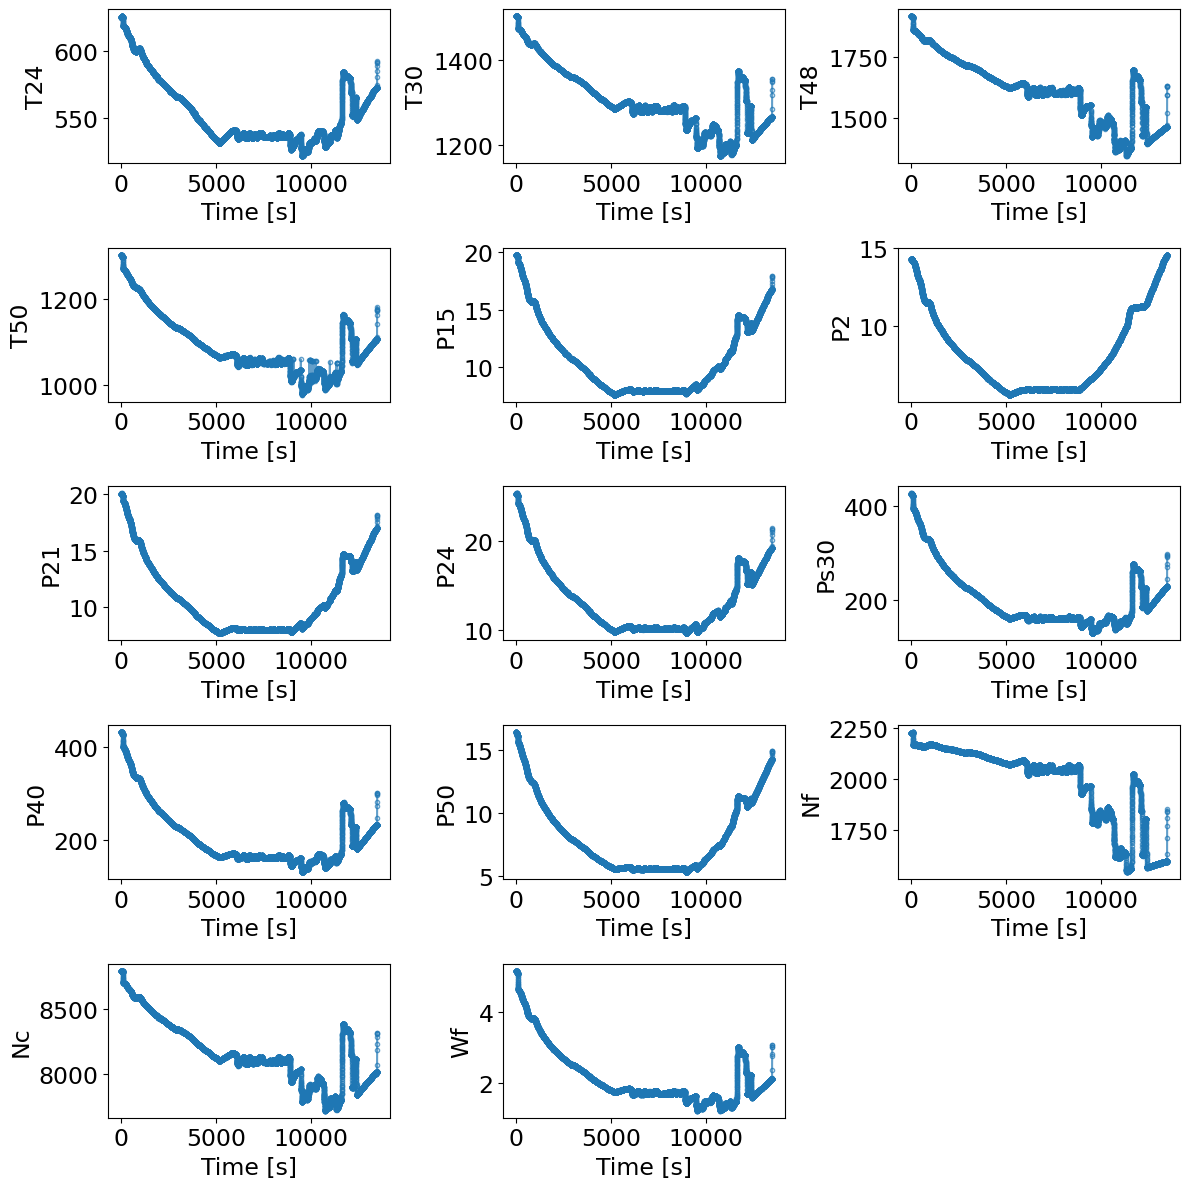

In [23]:
df_X_s_u_c = df_X_s.loc[(df_A.unit == 2) & (df_A.cycle == 1)]
df_X_s_u_c.reset_index(inplace=True, drop=True)
plot_df_single_color(df_X_s_u_c, X_s_var, X_s_var)

## Virtual Sensors ($X_v$)

In [24]:
df_X_v = DataFrame(data=X_v, columns=X_v_var) 

<Figure size 640x480 with 0 Axes>

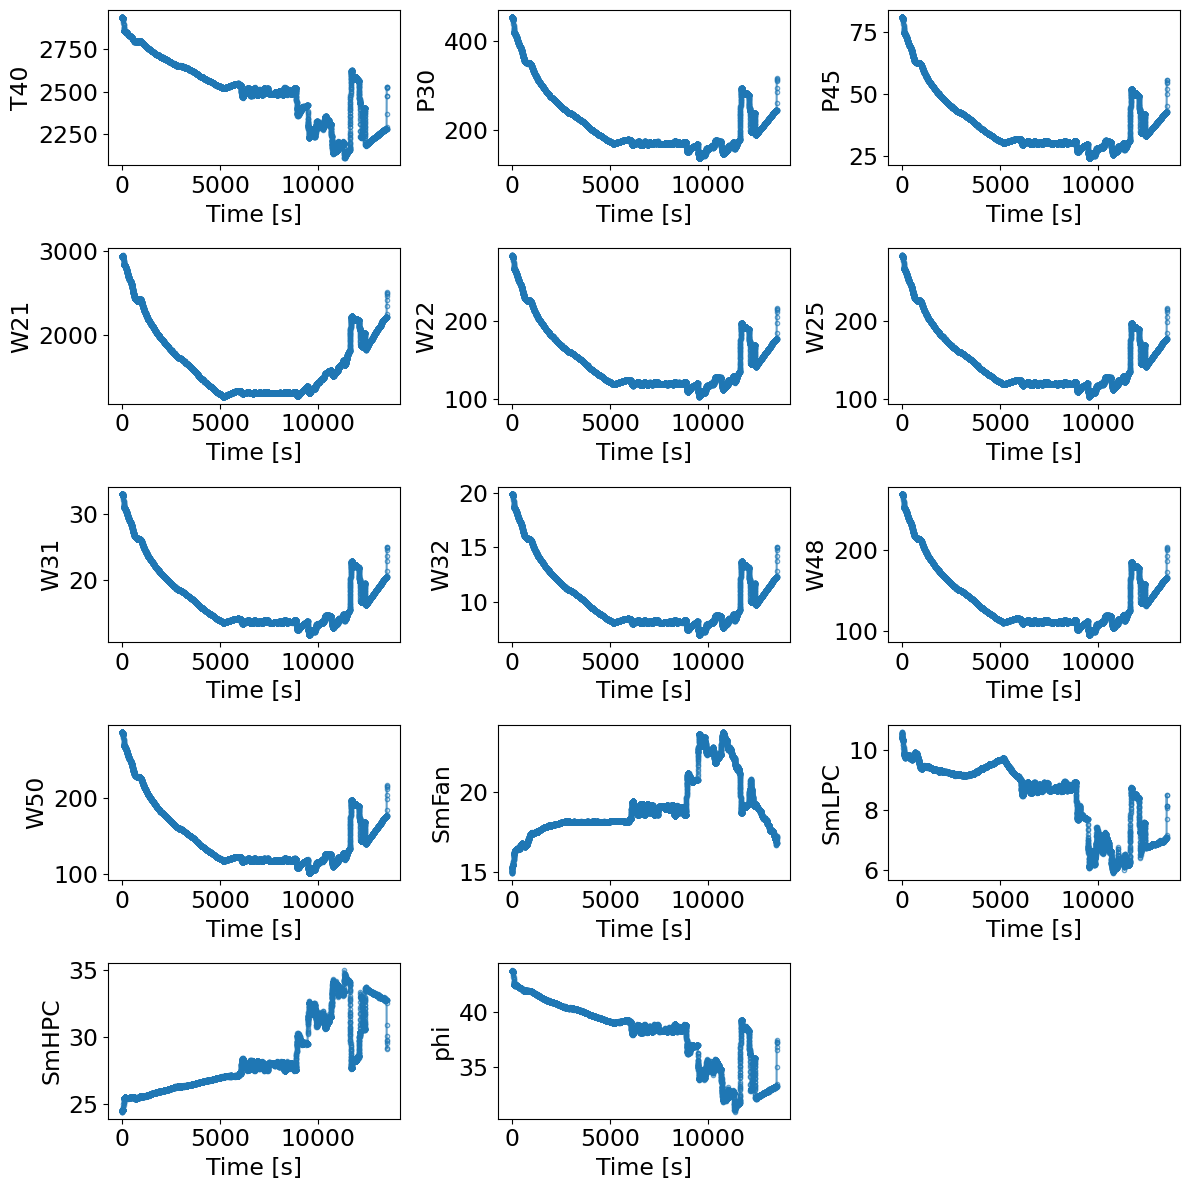

In [25]:
df_X_v_u_c = df_X_v.loc[(df_A.unit == 2) & (df_A.cycle == 1)]
df_X_v_u_c.reset_index(inplace=True, drop=True)
plot_df_single_color(df_X_v_u_c, X_v_var, X_v_var)

## Health state ($h_s$)

<Figure size 640x480 with 0 Axes>

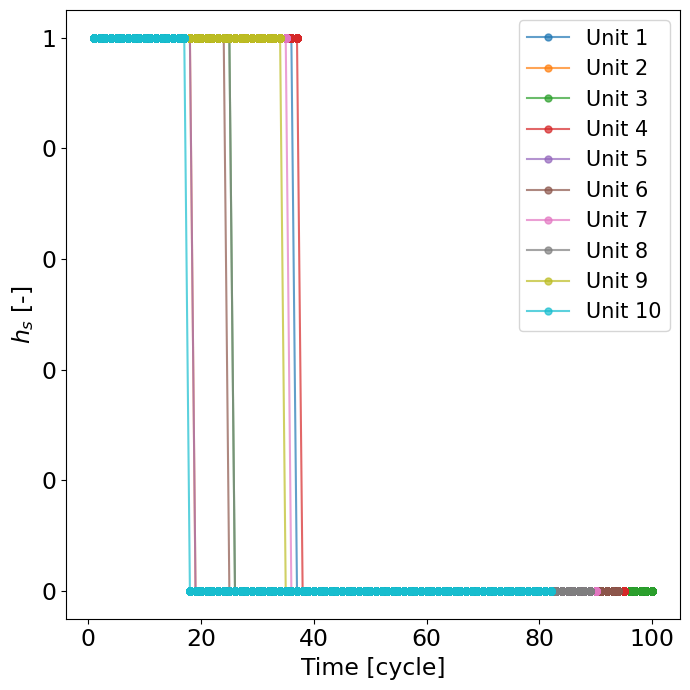

In [26]:
plot_df_color_per_unit(df_A, ['hs'], [r'$h_s$ [-]'], option='cycle')